In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats 
import random

In [128]:
df = pd.read_csv("/Users/matteo/Desktop/B4 /Projet Entreprise/2019Floor7.csv")

In [129]:
#selectionner que certaine ligne pour test code 
#dfe = df[2060:2120]
dfe = df[2000:2600]

# 1.0 Préparation des données

In [130]:
#selectionner que les column date et conso plug 
columns = ['Date', 'z1_Plug(kW)']
dfc = dfe[columns]
dfc['z1_Plug(kW)']=dfc['z1_Plug(kW)']*1000 #mettre KW and W
dfc = dfc.rename(columns={'z1_Plug(kW)': "z1_Plug(W)"})

/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_11011/2655864816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['z1_Plug(kW)']=dfc['z1_Plug(kW)']*1000 #mettre KW and W


# 2.0 Fonction Pour ajouter le Nombre de Prises Voulu

In [131]:
#ajouter column pour chaque prise 
def add_column(df,n_columns):
    for i in range (1,n_columns+1):
        name_col='p'+str(i)
        df[name_col]=np.nan

add_column(dfc,100)

/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_11011/2617044258.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[name_col]=np.nan


In [132]:
dfc.head(5)

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,2019-01-02 09:21:00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,2019-01-02 09:22:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,2019-01-02 09:23:00,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,2019-01-02 09:24:00,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Distribution normal

In [125]:
#ajouter valeur pour chaque prise en fonction du total et en suivant une distribution normal 
def split_value(df,n_plug):
    for row in df.index:
        temp = df["z1_Plug(W)"][row] #valeur total plug  
        datapoints = n_plug+1 #nombre de plug
        
        dev = 9
        data = np.random.normal(temp/datapoints, dev, datapoints-1)
        data = np.sort(data)
        
        while data[0] < 0:
            dev = dev-0.001
            data = np.random.normal(temp/datapoints, dev, datapoints-1)
            data = np.sort(data)
        
        print('total ', temp, ' dev ', dev)
        
        for j in range (1,n_plug+1) :
            col_name='p'+str(j)
            df[col_name][row]=data[j-1]

split_value(dfc,100)

total  150.0  dev  0.874999999999549
total  160.0  dev  1.0589999999995428
total  150.0  dev  0.881999999999549


/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_11011/53020714.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][row]=data[j-1]


total  160.0  dev  0.890999999999549
total  150.0  dev  0.7789999999995489
total  760.0  dev  5.368999999999676
total  700.0  dev  4.822999999999493
total  160.0  dev  0.9359999999995491
total  150.0  dev  0.826999999999549
total  160.0  dev  0.9389999999995491
total  140.0  dev  0.9089999999995491
total  160.0  dev  0.9849999999995491
total  140.0  dev  0.835999999999549
total  160.0  dev  1.0609999999995425
total  140.0  dev  0.807999999999549
total  150.0  dev  0.874999999999549
total  150.0  dev  0.9899999999995491
total  150.0  dev  0.836999999999549
total  150.0  dev  0.898999999999549
total  140.0  dev  0.809999999999549
total  120.0  dev  0.6149999999995488
total  110.0  dev  0.6029999999995488
total  440.0  dev  2.573999999999376
total  740.0  dev  4.6949999999994505
total  280.0  dev  2.020999999999437
total  110.0  dev  0.5489999999995487
total  120.0  dev  0.6429999999995488
total  110.0  dev  0.5559999999995487
total  120.0  dev  0.6519999999995488
total  110.0  dev  0.579

total  210.0  dev  1.1819999999995292
total  300.0  dev  1.5699999999994865
total  280.0  dev  1.7239999999994695
total  270.0  dev  1.62899999999948
total  280.0  dev  1.8039999999994607
total  270.0  dev  1.7869999999994626
total  210.0  dev  1.192999999999528
total  300.0  dev  1.8869999999994516
total  260.0  dev  1.4969999999994945
total  290.0  dev  1.7039999999994717
total  280.0  dev  2.028999999999436
total  200.0  dev  1.2189999999995251
total  360.0  dev  2.1679999999994206
total  240.0  dev  1.3409999999995117
total  790.0  dev  5.456999999999705
total  780.0  dev  4.750999999999469
total  380.0  dev  2.3789999999993974
total  280.0  dev  1.582999999999485
total  280.0  dev  1.6679999999994757
total  200.0  dev  1.092999999999539
total  300.0  dev  1.801999999999461
total  250.0  dev  1.5449999999994892
total  250.0  dev  1.4599999999994986
total  260.0  dev  1.664999999999476
total  270.0  dev  1.5389999999994899
total  280.0  dev  1.7669999999994648
total  270.0  dev  1.5

total  260.0  dev  1.5069999999994934
total  260.0  dev  1.5069999999994934
total  240.0  dev  1.456999999999499
total  270.0  dev  1.528999999999491
total  270.0  dev  1.4979999999994944
total  270.0  dev  1.5349999999994903
total  270.0  dev  1.7399999999994678
total  260.0  dev  1.5439999999994893
total  270.0  dev  1.6729999999994751
total  260.0  dev  1.4769999999994967
total  270.0  dev  1.8339999999994574
total  260.0  dev  1.7029999999994718
total  270.0  dev  1.664999999999476
total  270.0  dev  1.5759999999994858
total  670.0  dev  4.515999999999391
total  280.0  dev  1.7429999999994674
total  240.0  dev  1.2689999999995196
total  290.0  dev  1.664999999999476
total  280.0  dev  1.5799999999994854
total  250.0  dev  1.4049999999995046
total  270.0  dev  1.782999999999463
total  280.0  dev  1.5529999999994883
total  290.0  dev  1.6409999999994787
total  220.0  dev  1.329999999999513
total  290.0  dev  1.828999999999458
total  270.0  dev  1.582999999999485
total  290.0  dev  1.

In [126]:
dfc

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,0.214767,0.359356,0.391889,0.406927,0.426490,0.434564,0.461022,0.537902,...,2.536146,2.607048,2.613120,2.785862,2.899607,2.916263,2.929873,3.134834,3.221032,3.376014
2001,2019-01-02 09:21:00,160.0,0.014057,0.031068,0.040847,0.043738,0.054217,0.195906,0.259070,0.269354,...,3.021890,3.021979,3.023163,3.039341,3.107762,3.363223,3.681003,3.889002,4.198822,4.691589
2002,2019-01-02 09:22:00,150.0,0.035638,0.077293,0.160870,0.170867,0.191344,0.430472,0.432954,0.433597,...,2.416771,2.435688,2.469381,2.499987,2.562276,2.643345,2.856728,2.974925,3.020225,3.041470
2003,2019-01-02 09:23:00,160.0,0.016779,0.133106,0.225942,0.321956,0.337971,0.418751,0.431348,0.440175,...,2.633384,2.653343,2.702593,2.745065,2.915280,2.999649,3.059300,3.509491,3.559799,3.803733
2004,2019-01-02 09:24:00,150.0,0.003711,0.005490,0.060732,0.303724,0.328770,0.385011,0.424505,0.466839,...,2.358733,2.359455,2.385365,2.387206,2.414460,2.449672,2.793540,2.896488,3.633156,3.981120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2019-01-02 19:15:00,20.0,0.005281,0.029162,0.037319,0.041431,0.046604,0.048862,0.055611,0.057056,...,0.334974,0.347507,0.350803,0.359328,0.360939,0.385048,0.387946,0.398012,0.407993,0.438130
2596,2019-01-02 19:16:00,10.0,0.015032,0.018486,0.033952,0.039786,0.043371,0.044020,0.044281,0.050245,...,0.158183,0.160121,0.163709,0.168748,0.178181,0.180358,0.182709,0.184794,0.186109,0.193968
2597,2019-01-02 19:17:00,10.0,0.000232,0.010999,0.014601,0.014841,0.017001,0.019726,0.028023,0.029259,...,0.169778,0.173806,0.174117,0.174838,0.175438,0.181820,0.189188,0.214499,0.215579,0.233111
2598,2019-01-02 19:18:00,20.0,0.002634,0.016215,0.019831,0.035883,0.042606,0.043118,0.063036,0.063907,...,0.369680,0.374324,0.378343,0.386819,0.396951,0.412644,0.417645,0.430630,0.467325,0.479064


In [53]:
#verification aucune valeur negative 
dfc[(dfc["p1"]<=0)& \
    (dfc["p2"]<=0)]

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100


<AxesSubplot:ylabel='Frequency'>

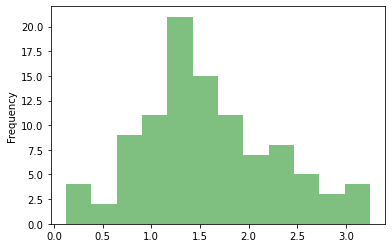

In [103]:
#Distribution normal low
first_ditributuion = dfc[(dfc["Date"]== "2019-01-02 09:22:00")]
selected_columns = first_ditributuion.iloc[:, 1:102]
Transposed = selected_columns.T.iloc[1:,:]


Transposed[2002].plot.hist(bins=12, alpha=0.5, color = "green")

# Distribution Poisson

# Essaie distribution poisson avec amelioration valeur élevé 

In [133]:
#ajouter valeur pour chaque prise en fonction du total et en suivant une distribution poisson 
def split_value_poisson(df,n_plug,perc_change,n_high_device):
    temp=0
    same = True
    datapoints = n_plug+1 #nombre de plug
    rand=1
    changerateUp = 1+perc_change/100
    changerateDown = 1-perc_change/100
    for row in df.index:
        
        if temp == 0 : 
            
            temp = df["z1_Plug(W)"][row] #valeur total plug 
        
            data = [] 
            while sum(data) != temp :
                data = np.random.poisson(temp/datapoints, datapoints-1)
            data = np.sort(data)
        
            for j in range (1,n_plug+1) :
                col_name='p'+str(j)
                df[col_name][row]=data[j-1]
                
        else : 
            if temp < df["z1_Plug(W)"][row]*changerateUp and temp > df["z1_Plug(W)"][row]*changerateDown :
               
                temp = df["z1_Plug(W)"][row] #valeur total plug 
                same = False
                data = [] 
                while sum(data) != temp :
                    data = np.random.poisson(temp/datapoints, datapoints-1)
                data = np.sort(data)
                for j in range (1,n_plug+1) :
                    col_name='p'+str(j)
                    df[col_name][row]=data[j-1]
        
            else:
                
                data = [] 
                while sum(data) != temp :
                    data = np.random.poisson(temp/datapoints, datapoints-1)
                data = np.sort(data)

                if same == True : 
                    data[-rand]= data[-rand] + (df["z1_Plug(W)"][row]-temp)
                else:
                    rand = random.randint(1,n_high_device)
                    data[-rand]= data[-rand] + (df["z1_Plug(W)"][row]-temp)
                    if data[-rand]<0 :
                        print("error ", df["z1_Plug(W)"][row]-temp)
                    same = True
                
                if data[-rand]<0 :

                    temp = df["z1_Plug(W)"][row] #valeur total plug 
                    data = [] 
                    while sum(data) != temp :
                        data = np.random.poisson(temp/datapoints, datapoints-1)
                    data = np.sort(data)
                    
                for j in range (1,n_plug+1) :
                    col_name='p'+str(j)
                    df[col_name][row]=data[j-1]
                
                

split_value_poisson(dfc,100,35,6)

/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_11011/475141917.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][row]=data[j-1]
/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_11011/475141917.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][row]=data[j-1]
/var/folders/vs/v4q4q5m97150k7z9stfc86l80000gn/T/ipykernel_11011/475141917.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

error  -130.0
error  -110.0
error  -120.0
error  -90.0
error  -80.0
error  -80.0
error  -140.0
error  -120.0
error  -150.0
error  -170.0
error  -80.0


In [134]:
dfc

,Date,z1_Plug(W),p1,p2,p3,p4,p5,p6,p7,p8,...,p91,p92,p93,p94,p95,p96,p97,p98,p99,p100
2000,2019-01-02 09:20:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0
2001,2019-01-02 09:21:00,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0
2002,2019-01-02 09:22:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,6.0
2003,2019-01-02 09:23:00,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0
2004,2019-01-02 09:24:00,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,2019-01-02 19:15:00,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0
2596,2019-01-02 19:16:00,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2597,2019-01-02 19:17:00,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
2598,2019-01-02 19:18:00,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11.0


       2005
p1      0.0
p2      0.0
p3      0.0
p4      0.0
p5      0.0
...     ...
p96     3.0
p97   613.0
p98     4.0
p99     4.0
p100    4.0

[100 rows x 1 columns]


<AxesSubplot:ylabel='Frequency'>

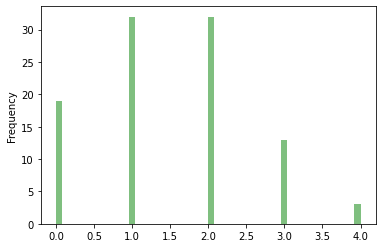

In [152]:
#Distribution normal low
first_ditributuion = dfc[(dfc["Date"]== "2019-01-02 09:25:00")]
selected_columns = first_ditributuion.iloc[:, 1:102]

Transposed = selected_columns.T.iloc[1:,:]
print(Transposed)

plot_less = Transposed[Transposed[2005]<=10]

plot_high =Transposed[Transposed[2005]>=10]

plot_less[2005].plot.hist(bins=50, alpha=0.5, color = "green")


<AxesSubplot:ylabel='Frequency'>

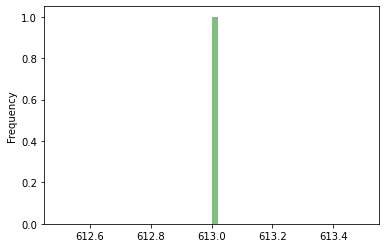

In [153]:
plot_high[2005].plot.hist(bins=50, alpha=0.5, color = "green")

In [147]:
dfc.to_csv('dfc.csv') 